# Matplotlib example
Here is an example of making a simple seasonality chart using [matplotlib](https://matplotlib.org/).

This shows observations counts by month (all years) for monarch butterflies observed in the state of Iowa.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyinaturalist.node_api import get_all_observations

In [2]:
# Then, get all observations in that place of a given species
observations = get_all_observations(
    taxon_name='Danaus plexippus',
    photos=True,
    geo=True,
    geoprivacy='open',
    place_id=24,
    per_page=200,
)
print(len(observations))

# Flatten nested JSON values
df = pd.json_normalize(observations)
df['observed_month'] = df['observed_on'].apply(lambda x: x.month)

590


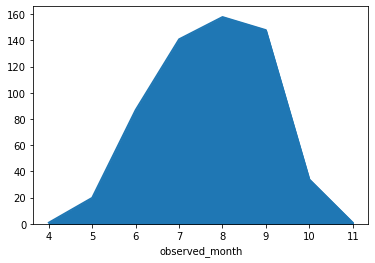

In [3]:
# Plot observation counts by month
df['observed_month'].groupby(df['observed_month']).count().plot(kind='area')
plt.show()